# aSPEM Experiment : analysis




TODO: tester qu'à chaque pause, l'agent se réinitialise à $\hat{p}=.5$

In [1]:
%load_ext autoreload
%autoreload 2
#from __future__ import division, print_function, absolute_import
import glob
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
exts = ['.png', '.svg', '.pdf']

In [3]:
%matplotlib inline
fig_width = 15

from aSPEM import aSPEM
import bayesianchangepoint as bcp

In [4]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)

In [5]:
#COLOR = ['black','dimgrey','grey','darkgrey','silver','rosybrown','lightcoral','indianred','firebrick','brown', 'darkred','red']
list_sujet = ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','TN','YK']

nb_sujet = len(list_sujet)
COLOR = [(0+(1/nb_sujet)*n, 0, 0, 0.5) for n in range(nb_sujet)]

In [6]:
from aSPEM import Analysis
e = Analysis(name_file_fit='fct_velocity_sigmo')

## Data Scalling

In [7]:
data_scalling = e.Data_Scalling()

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
new_bet = data_scalling['new_bet_full']
new_va = data_scalling['new_va_full']

## Find h

In [9]:
h_bet, h_va = e.Find_h(new_bet, new_va)

AM BMC CS DC FM IP LB OP RS SR TN YK 

In [10]:
fig_width = 15
t_titre = 70
t_label = (30*4)/3

In [11]:
def regress(ax, p, data, c, minx=0, miny=0, maxx=1, maxy=1, t_label=t_label) :
    from scipy import stats
    slope, intercept, r_, p_value, std_err = stats.linregress(p, data)
    x_test = np.linspace(np.min(p), np.max(p), 100)
    fitLine = slope * x_test + intercept
    ax.plot(x_test, fitLine, c=c, linewidth=2)
    
    ax.text(maxx-((maxx-minx)/10), miny+((maxy-miny)/10), 'r = %0.3f\np_value = %0.3f'%(r_, p_value), fontsize=t_label/1.2, ha='right', color=c)
    return ax

In [12]:
def scatter_mean(bet, va, titre, maxx=0.55, maxy=0.25, ex=0.02, ey=0.01,
                 ellipse=False, triangle=False, color=False, mean='mean', supp=False, fig_width=10) :
    
    if ellipse is True :
        from matplotlib.patches import Ellipse
    
    fig, axs = plt.subplots(1, 1, figsize=((fig_width), (fig_width)), constrained_layout=True) #/(1.6180*1))
    
    if type(bet)==dict :
        list_bet, list_va = [], []
        for s in list_sujet :
            list_bet.append(bet[s])
            list_va.append(va[s])
        bet, va = list_bet, list_va
    
    
    m_bet, m_va = [], []
    for x in range(len(bet)):
        if color is False : c = 'k'
        else :              c = color[x]
        
        if ellipse is True :
            ells = Ellipse((np.mean(bet[x]), np.mean(va[x])), 2*np.std(bet[x]), 2*np.std(va[x]), 0,
                           color='k', alpha=0.2, clip_box=axs.bbox)
            axs.add_artist(ells)
        elif triangle is True :
            #axs.scatter(bet[x], va[x], c=[c])
            baba = np.array([[bet[x][y], va[x][y]] for y in range(len(va[x]))])
            from matplotlib.patches import Circle, Wedge, Polygon
            poly = Polygon(baba, color=c, alpha=0.2)
            axs.add_artist(poly)
            
        if mean=='mean' :
            mean_bet = np.mean(bet[x])
            mean_va = np.mean(va[x])
        elif mean=='mediane' :
            mean_bet = np.median(bet[x])
            mean_va = np.median(va[x])           
            
        if triangle is True :
            axs.scatter(mean_bet, mean_va, color=c,  s=100, alpha=0.9)
        
        else :
            axs.errorbar(mean_bet, mean_va,
                         xerr=np.std(bet[x]), yerr=np.std(va[x]),
                         color=c, fmt='o', elinewidth=2, ms=10, alpha=0.6)

        m_bet.append(mean_bet)
        m_va.append(mean_va)

    axs.set_title(titre, fontsize=t_titre)
    axs.set_xlabel('h$_{bet}$', fontsize=t_label)
    axs.set_ylabel('h$_{v_a}$', fontsize=t_label)
    axs.tick_params(axis='both', labelsize=t_label/1.8)
    
    axs.axis([-ex ,maxx+ex,-ey,maxy+ey])
    axs.plot(np.arange(-10,10), np.arange(-10,10), '--k')

    regress(axs, m_bet, m_va, 'r', minx=-ex, miny=-ey, maxx=maxx+ex, maxy=(maxy+ey)/2)
    
    if supp is True :
        del m_va[np.argmax(m_bet)]
        del m_bet[np.argmax(m_bet)]
        del m_va[np.argmax(m_bet)]
        del m_bet[np.argmax(m_bet)]

        regress(axs, m_bet, m_va, 'k', minx=0, miny=maxy/2, maxx=maxx, maxy=maxy)
    
    fig.tight_layout()
    plt.show()
    return fig, axs

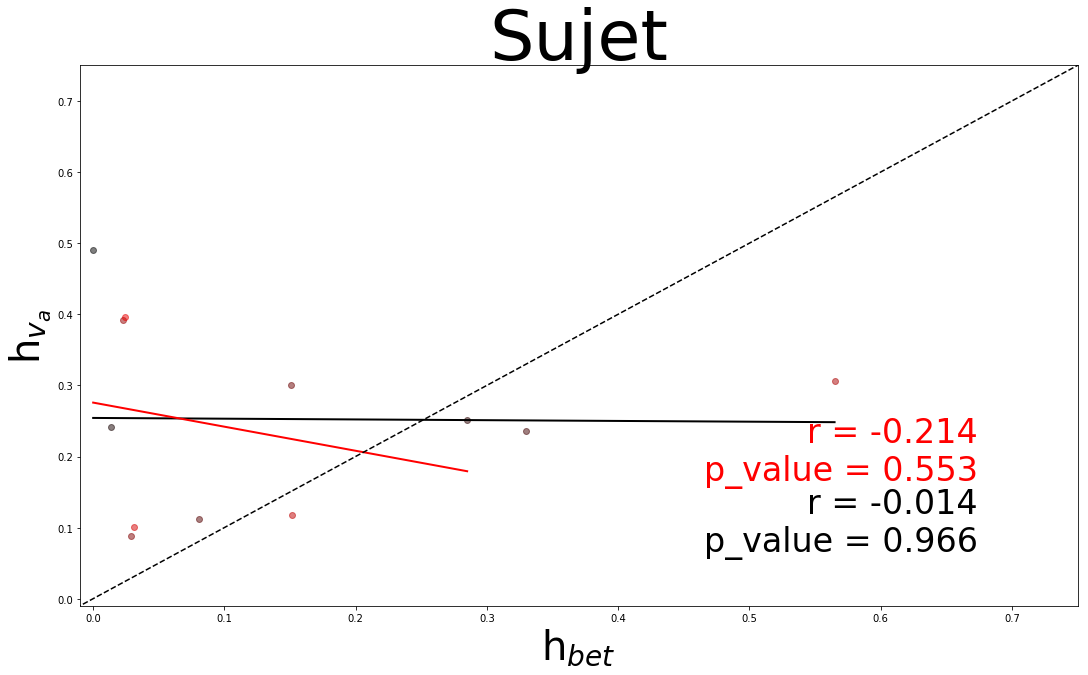

In [13]:
fig, axs = plt.subplots(1, 1, figsize=((fig_width), (fig_width)/(1.6180*1)), constrained_layout=True)

h_bet_sujet, h_va_sujet = [], []
for x, s in enumerate(list_sujet):
    h_bet_sujet.extend(h_bet['sujet'][s])
    h_va_sujet.extend(h_va['sujet'][s])
    
    axs.scatter(h_bet['sujet'][s], h_va['sujet'][s],color=COLOR[x])

axs.set_title('Sujet', fontsize=t_titre)
axs.set_xlabel('h$_{bet}$', fontsize=t_label)
axs.set_ylabel('h$_{v_a}$', fontsize=t_label)
axs.axis([-0.01 ,0.75,-0.01,0.75])

regress(axs, h_bet_sujet, h_va_sujet, 'k', minx=-0.01, miny=-0.01, maxx=0.75, maxy=0.75)

Hva = h_va_sujet.copy()
Hbet = h_bet_sujet.copy()

del Hva[np.argmax(Hbet)]
del Hbet[np.argmax(Hbet)]
del Hva[np.argmax(Hbet)]
del Hbet[np.argmax(Hbet)]
regress(axs, Hbet, Hva, 'r', minx=-0.01, miny=0.1, maxx=0.75, maxy=0.75)

axs.plot(np.arange(-10,10), np.arange(-10,10), '--k')
plt.show()

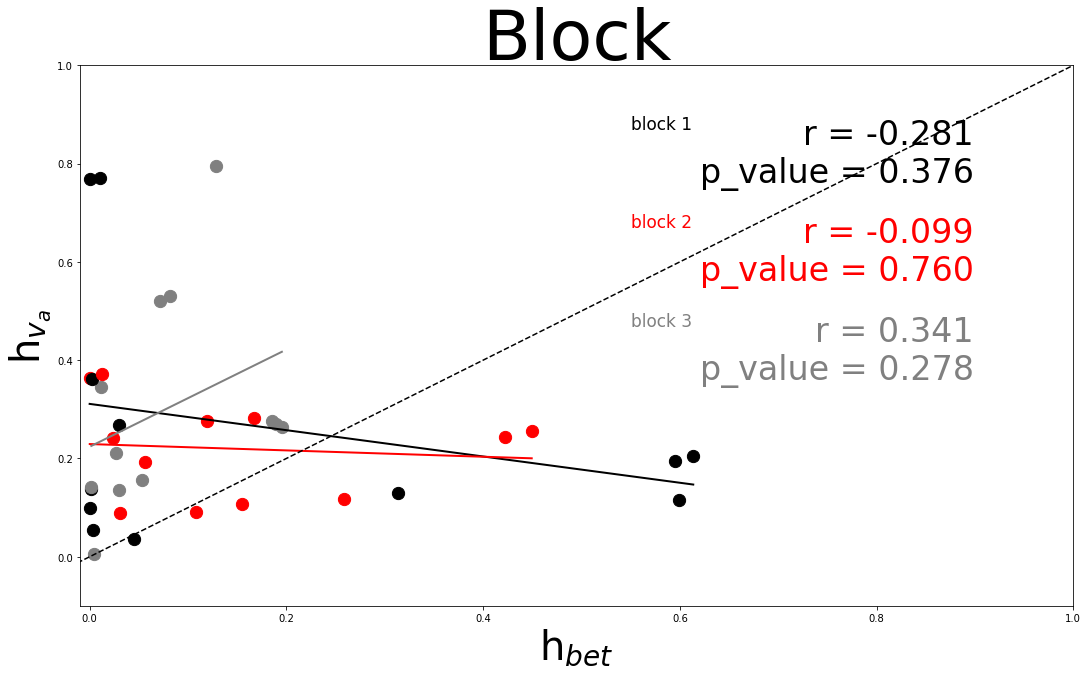

In [14]:
fig, axs = plt.subplots(1, 1, figsize=((fig_width), (fig_width)/(1.6180*1)), constrained_layout=True)

c = ['k', 'r', 'grey']

h_bet_block = []
h_va_block = []

for x, s in enumerate(list_sujet):
    for a in range(len(h_bet['block'][s])) :
        axs.scatter(h_bet['block'][s][a], h_va['block'][s][a],color=c[a], s=150)
        if x==0:
            h_bet_block.append([])
            h_va_block.append([])
        h_bet_block[a].append(h_bet['block'][s][a])
        h_va_block[a].append(h_va['block'][s][a])

for a in range(len(h_bet_block)) :
    axs.text(0.55, 0.9-(0.2*(a)+((0.1*(a+3)-0.1*(a))/10)), 'block %s'%(a+1), color=c[a], fontsize=17)
    axs=regress(axs, h_bet_block[a], h_va_block[a], c[a], minx=-0.01, miny=0.8-(0.2*(a)), maxx=1, maxy=1-(0.2*(a+3)))

axs.set_title('Block', fontsize=t_titre)
axs.set_xlabel('h$_{bet}$', fontsize=t_label)
axs.set_ylabel('h$_{v_a}$', fontsize=t_label)
axs.axis([-0.01 ,1,-0.1,1])

axs.plot(np.arange(-10,10), np.arange(-10,10), '--k')
plt.show()

Moyenne par block


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


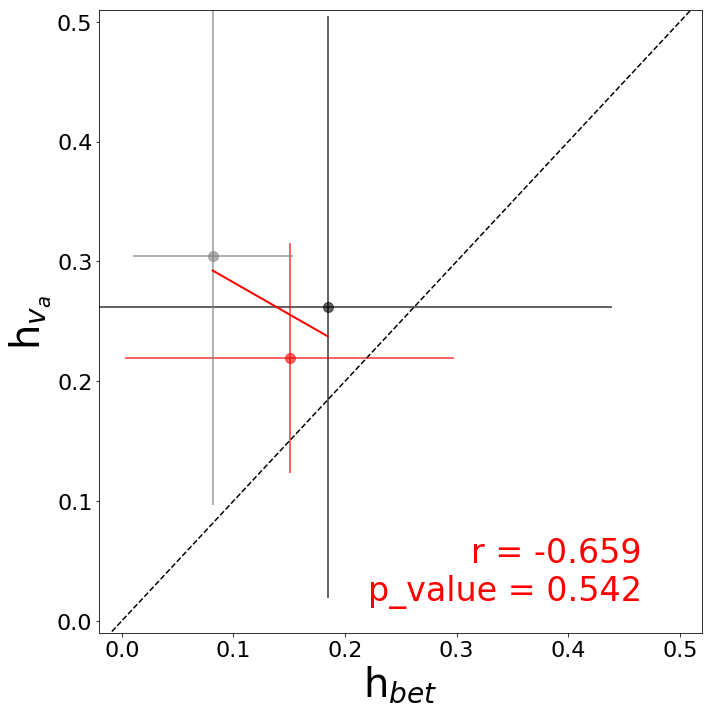

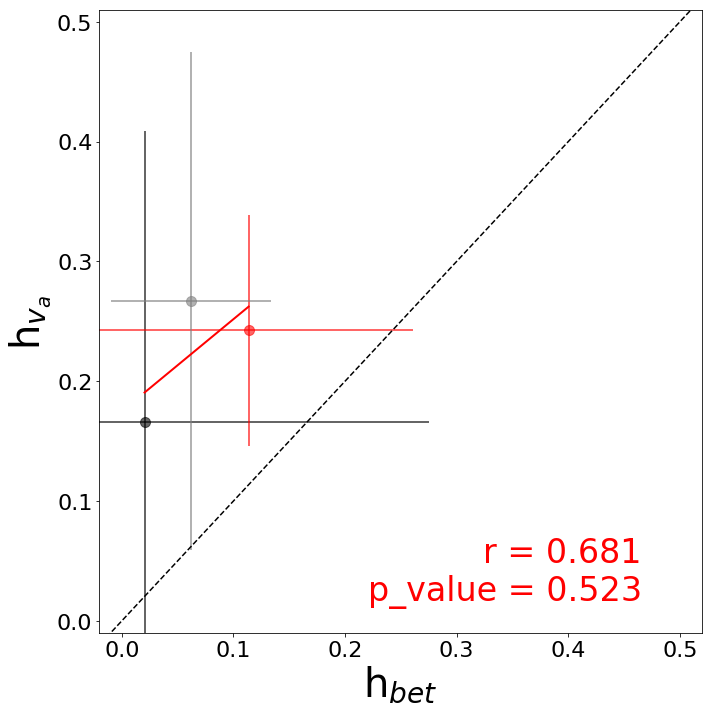

In [15]:
print('Moyenne par block')
fig, axs = scatter_mean(h_bet_block, h_va_block, '', maxx=0.5, maxy=0.5, color=c)
fig, axs = scatter_mean(h_bet_block, h_va_block, '', maxx=0.5, maxy=0.5, mean='mediane', color=c)

#fig1, axs1 = scatter_mean(h_bet_block, h_va_block, '', maxx=0.1, maxy=0.1, ellipse=True)

Moyenne par Sujet block


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


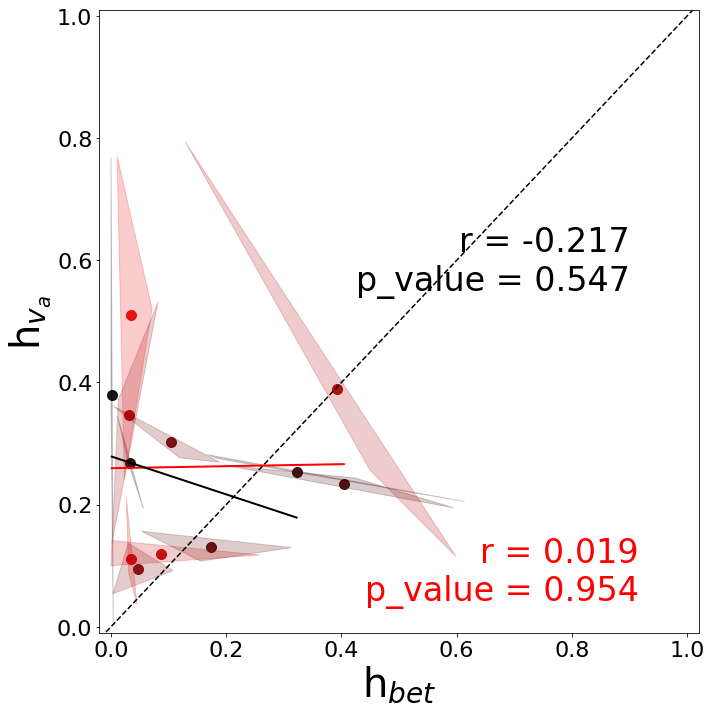

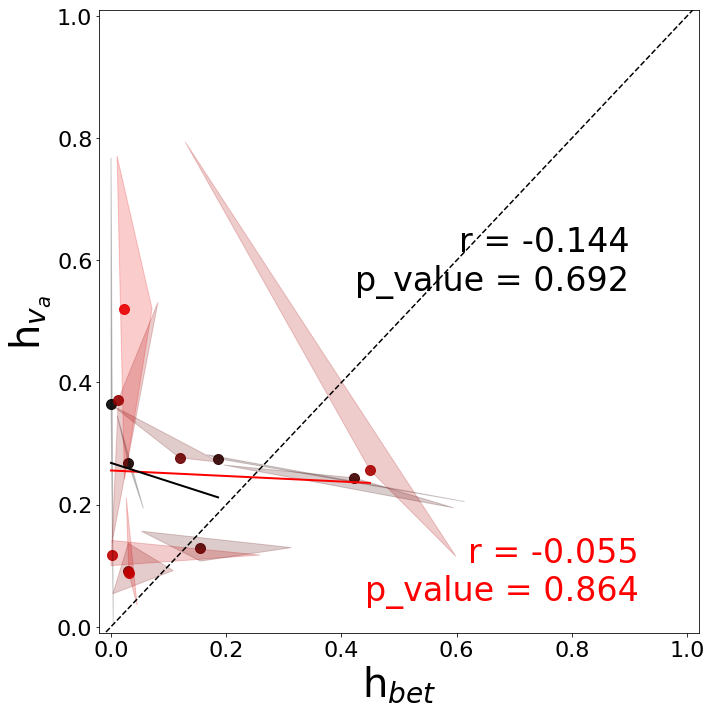

In [16]:
print('Moyenne par Sujet block')
fig, axs = scatter_mean(h_bet['block'], h_va['block'], '',triangle=True, maxx=1, maxy=1, supp=True, color=COLOR)
#for ext in exts: fig.savefig('ms/figures/5_inter-individual_differences_fit' + ext, dpi=400)

fig, axs = scatter_mean(h_bet['block'], h_va['block'], '', triangle=True, maxx=1, maxy=1, mean='mediane', supp=True, color=COLOR)

##fig1, axs1 = scatter_mean(h_bet['block'], h_va['block'], '', maxx=0.4, maxy=0.1, ellipse=True)

Moyenne par Sujet pause


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


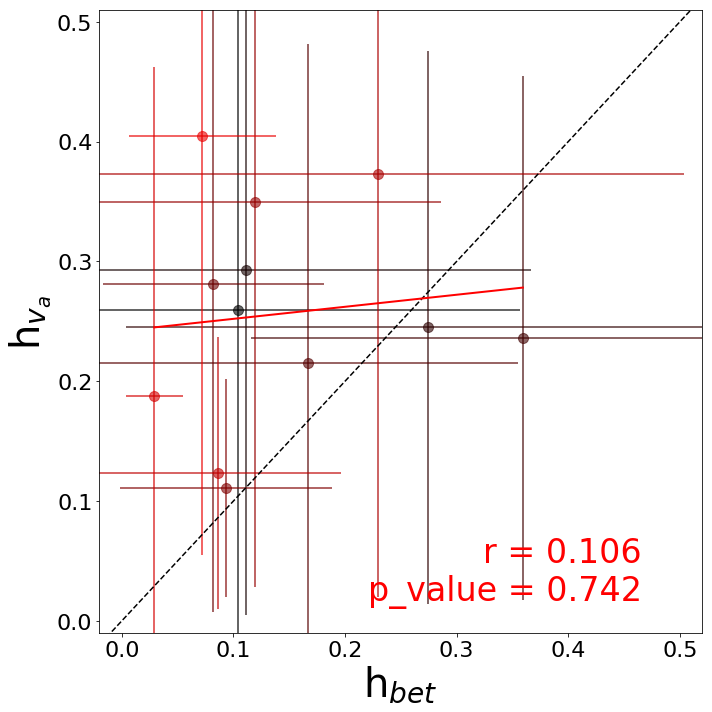

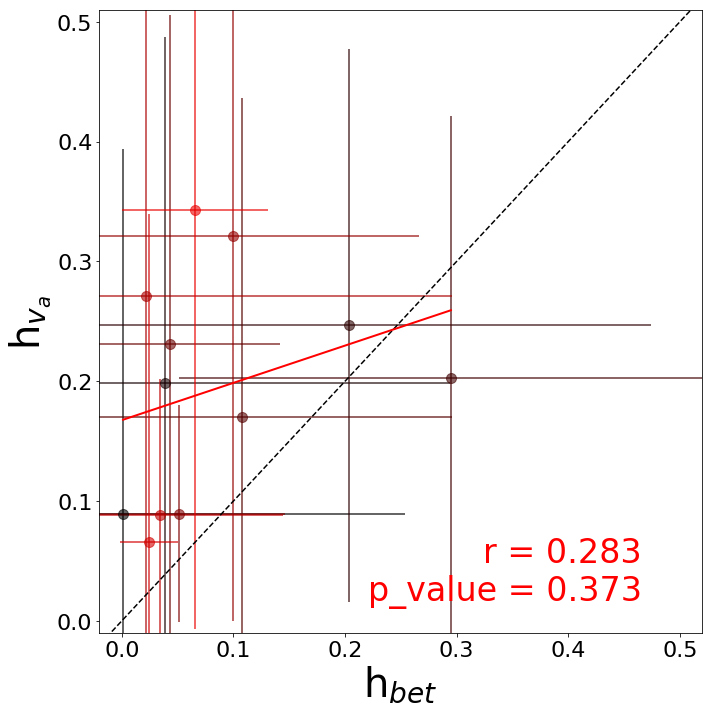

In [17]:
print('Moyenne par Sujet pause')
fig, axs = scatter_mean(h_bet['pause'], h_va['pause'], '', maxx=0.5, maxy=0.5, color=COLOR)
fig, axs = scatter_mean(h_bet['pause'], h_va['pause'], '', maxx=0.5, maxy=0.5, mean='mediane', color=COLOR)
##fig1, axs1 = scatter_mean(h_bet['pause'], h_va['pause'], '',maxx=0.4, maxy=0.4, ellipse=True)

## MI